# Visualizações para o nosso dataframe

## Imports

In [1]:
import pandas as pd
from string import punctuation
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

## Carregando dataframe

In [2]:
df = pd.read_csv('./saved_dataframe/df.csv')
df.head()

Data             User  \
0  2022-10-01 23:59:59+00:00    grandalsavino   
1  2022-10-01 23:59:59+00:00  HellendaRochaV1   
2  2022-10-01 23:59:58+00:00  antunes_shirlei   
3  2022-10-01 23:59:58+00:00  EstranhoDemais1   
4  2022-10-01 23:59:58+00:00        riosvida6   

                                               Texto  Candidato  \
0  Aqui no Paranoá vou assim...\r\n@DenianCouto @...  Bolsonaro   
1  @denisoon_ Meus primos que nunca trabalharam n...  Bolsonaro   
2  @Doutorapetista @lovato_po @jairbolsonaro @man...  Bolsonaro   
3  @Marisete1982 @Fa1ryNight A luta é constante, ...  Bolsonaro   
4  Porque votar em Jair Bolsonaro neste domingo h...  Bolsonaro   

                                       pre-processed Sentimento  
0                  aqui no paranoá vou assim...        Negativo  
1   meus primos que nunca trabalharam na vida são...   Positivo  
2   po   q horror chamar uma pessoa de câncer. el...   Negativo  
3    a luta é constante, mas venceremos, fé em de...   Positivo  
4      porque votar em jair bolsonaro neste domingo    Negativo

### Subsets

In [3]:
dfBolsonaro = df[(df['Candidato'] == 'Bolsonaro')]
dfLula = df[(df['Candidato'] == 'Lula')]
# Create df_bolsonaro_pos (Bolsonaro, Positive sentiment)
df_bolsonaro_pos = df[(df['Candidato'] == 'Bolsonaro') & (df['Sentimento'] == 'Positivo')]

# Create df_bolsonaro_neg (Bolsonaro, Negative sentiment)
df_bolsonaro_neg = df[(df['Candidato'] == 'Bolsonaro') & (df['Sentimento'] == 'Negativo')]

# Create df_lula_pos (Lula, Positive sentiment)
df_lula_pos = df[(df['Candidato'] == 'Lula') & (df['Sentimento'] == 'Positivo')]

# Create df_lula_neg (Lula, Negative sentiment)
df_lula_neg = df[(df['Candidato'] == 'Lula') & (df['Sentimento'] == 'Negativo')]

In [25]:
dfBolsonaro.Sentimento.value_counts()

Sentimento
Negativo    19112
Positivo     9485
Neutro       2403
Name: count, dtype: int64

In [26]:
dfLula.Sentimento.value_counts()

Sentimento
Negativo    22447
Positivo     6599
Neutro       1954
Name: count, dtype: int64

In [4]:
stopwords = nltk.corpus.stopwords.words('portuguese')

pontuacao = []
for ponto in punctuation:
    pontuacao.append(ponto)

stopwords = pontuacao = stopwords
stopwords.extend(['ta', 'the', 'passou', 'elec2', 'irei', 'quer', '_', 'pra', 'deve', 'dtype', 'Length', 'object', 'Texto', 'Name', "Eleicoes2022","Eleições2022","RT","por","de",
                  'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue',
                  'pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias',
                  'tirou','tem','p' ,'q', 's', '0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc', 'la', 'dia', 'noite', 'diz', 'falam', 'aí', 'deu', 'via', 'disso', 'y', 
                  'qnd', 'porque', 'pq', 'tão', 'toda', 'todo', 'todas', 'todos', 'tal', 'ainda', 'el', 'http', 'https', 'so', 'r', 'nesse', 'nele', 'né', 'desse', 'tô', 'n', 'kkk', 'kkkk', 'kkkkk', 
                  'kkkkkk', 'sei', 'dizer', 'ir', 'falar', 'dá', 'vão', 'vcs', 'ai', 'acho', 'vi', 'tava', 'sendo', 'ia', 'tbm', 'dm', 'dl', 'sim', 'falando', 'mim', 'nao', 'onde', 'quanto'])

# Nuvens de Palavras

### Nuvem de palavras dos tweets contendo Bolsonaro.

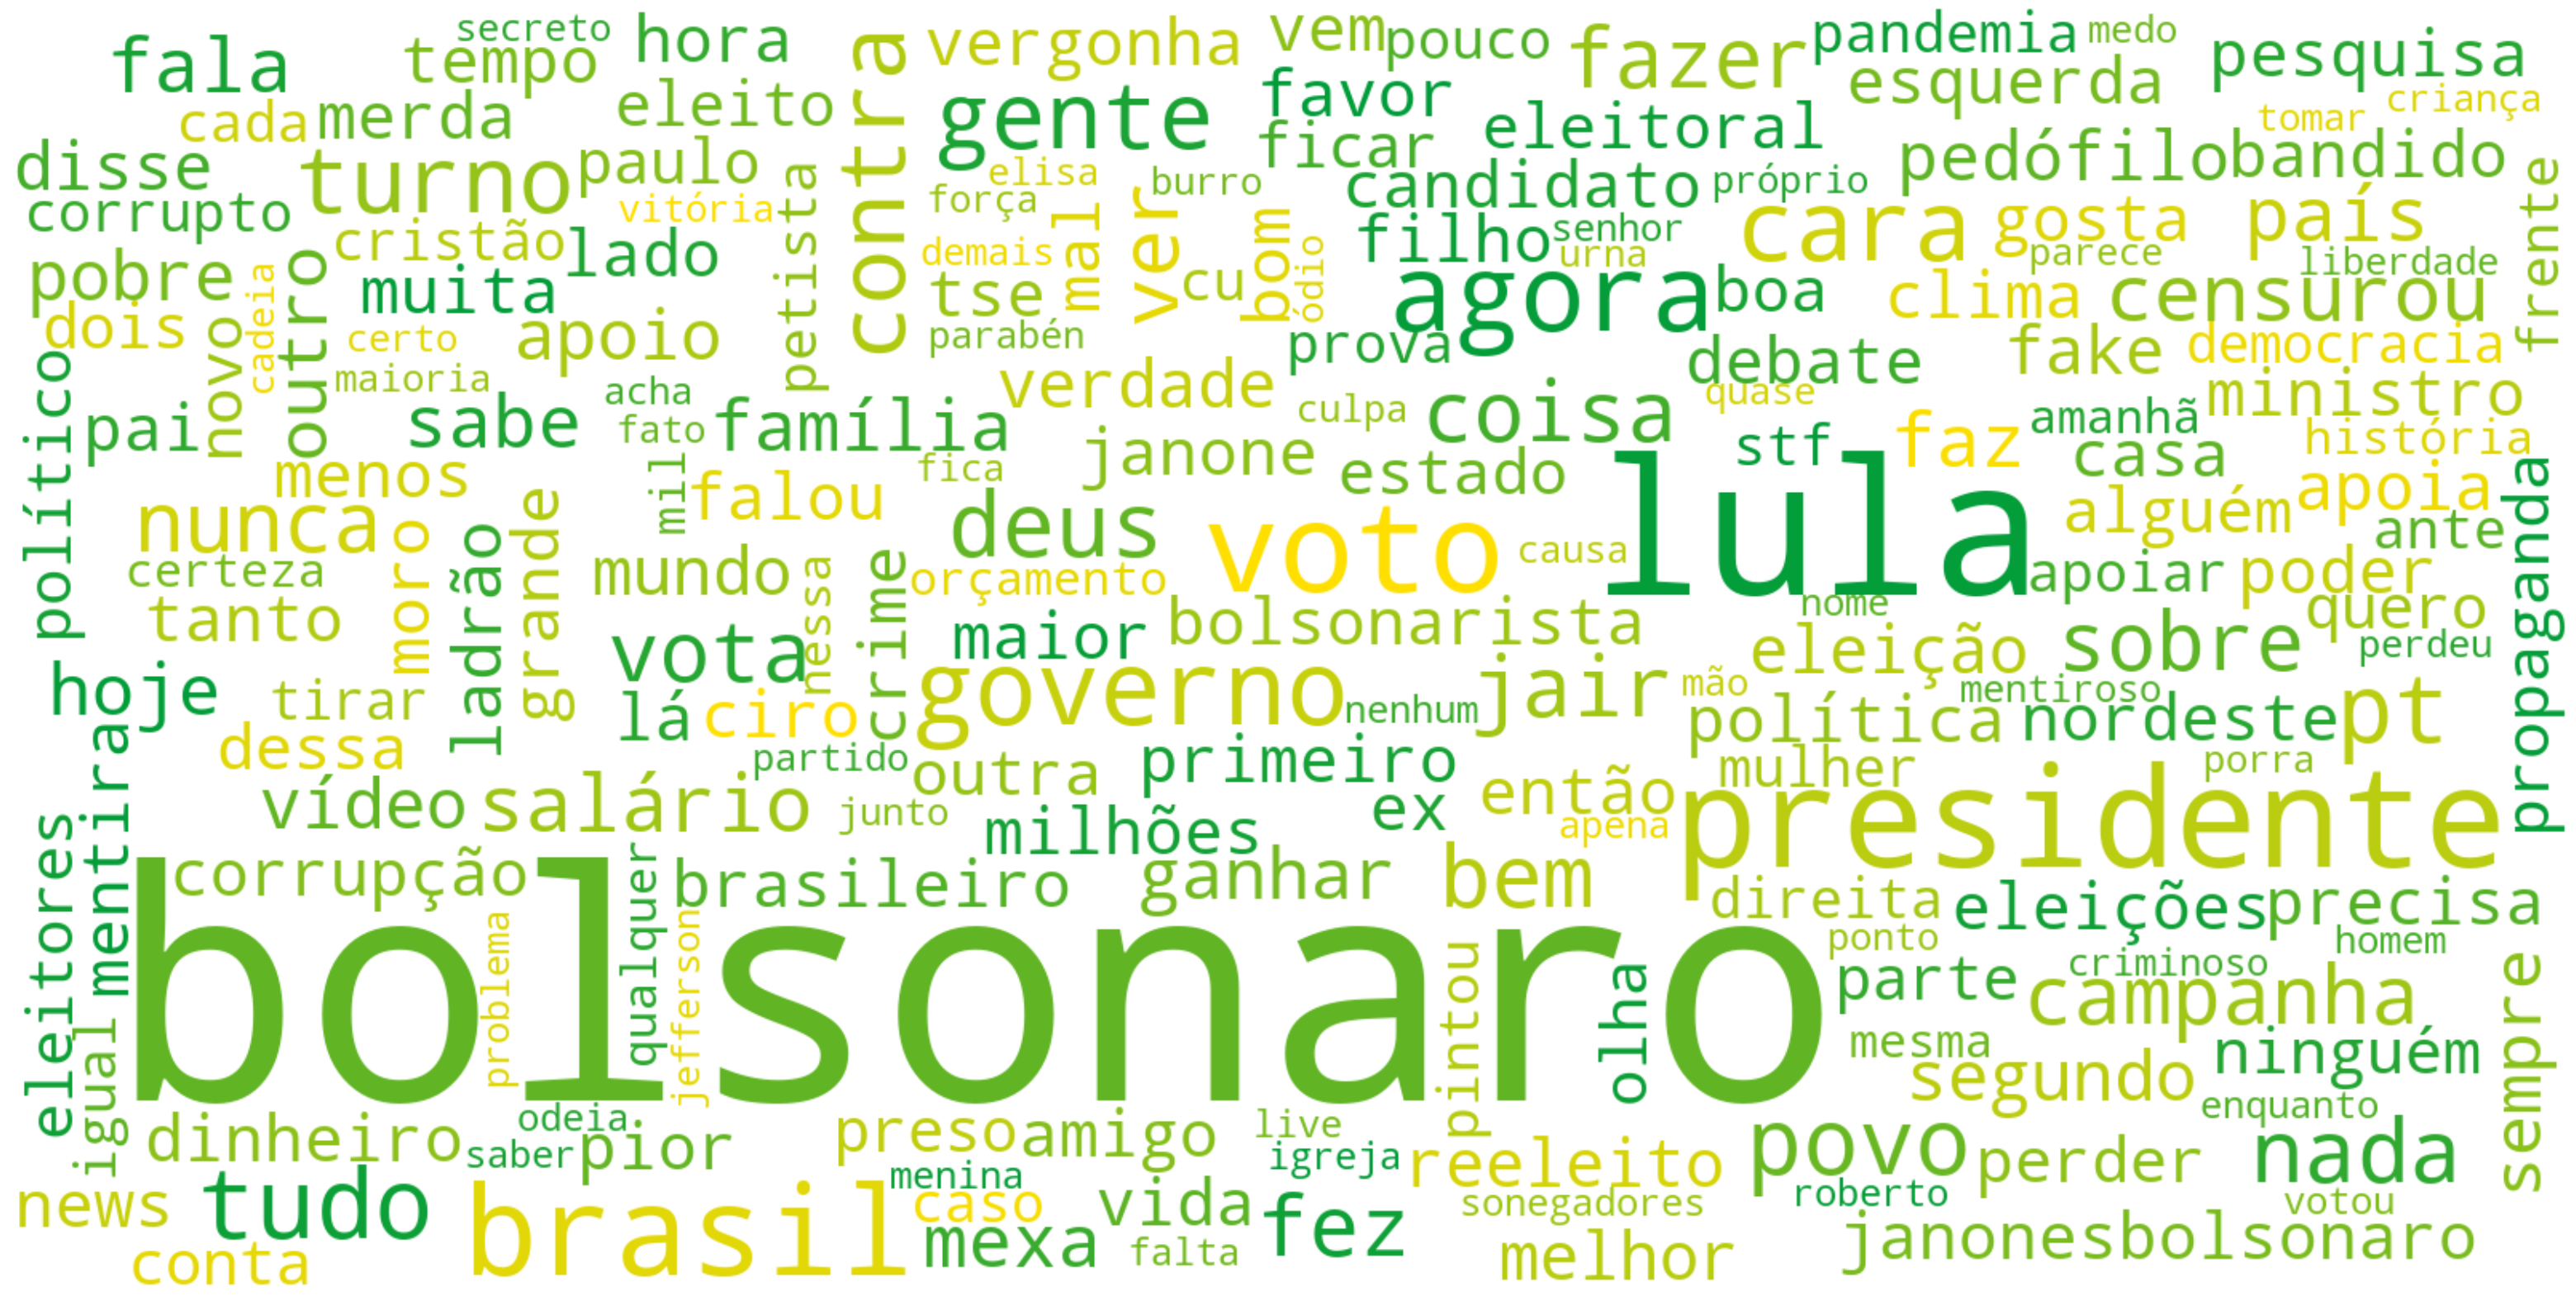

In [5]:
text = str(list(dfBolsonaro['pre-processed'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('_', '')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#009c3b', '#ffdf00'])
wordcloud = WordCloud(width=1600, colormap=cmap, stopwords=stopwords, height=800, max_font_size=200, collocations=False, background_color='white').generate(text)
# Chama a função `figure()` para criar uma nova figura
fig, ax = plt.subplots(figsize=(40, 30))
# Exibe a nuvem de palavras
ax.imshow(wordcloud, interpolation="bilinear")
# Desativa os eixos da figura
ax.set_axis_off()
# Exibe a figura
plt.show()

### Nuvem de palavras dos tweets contendo Lula.

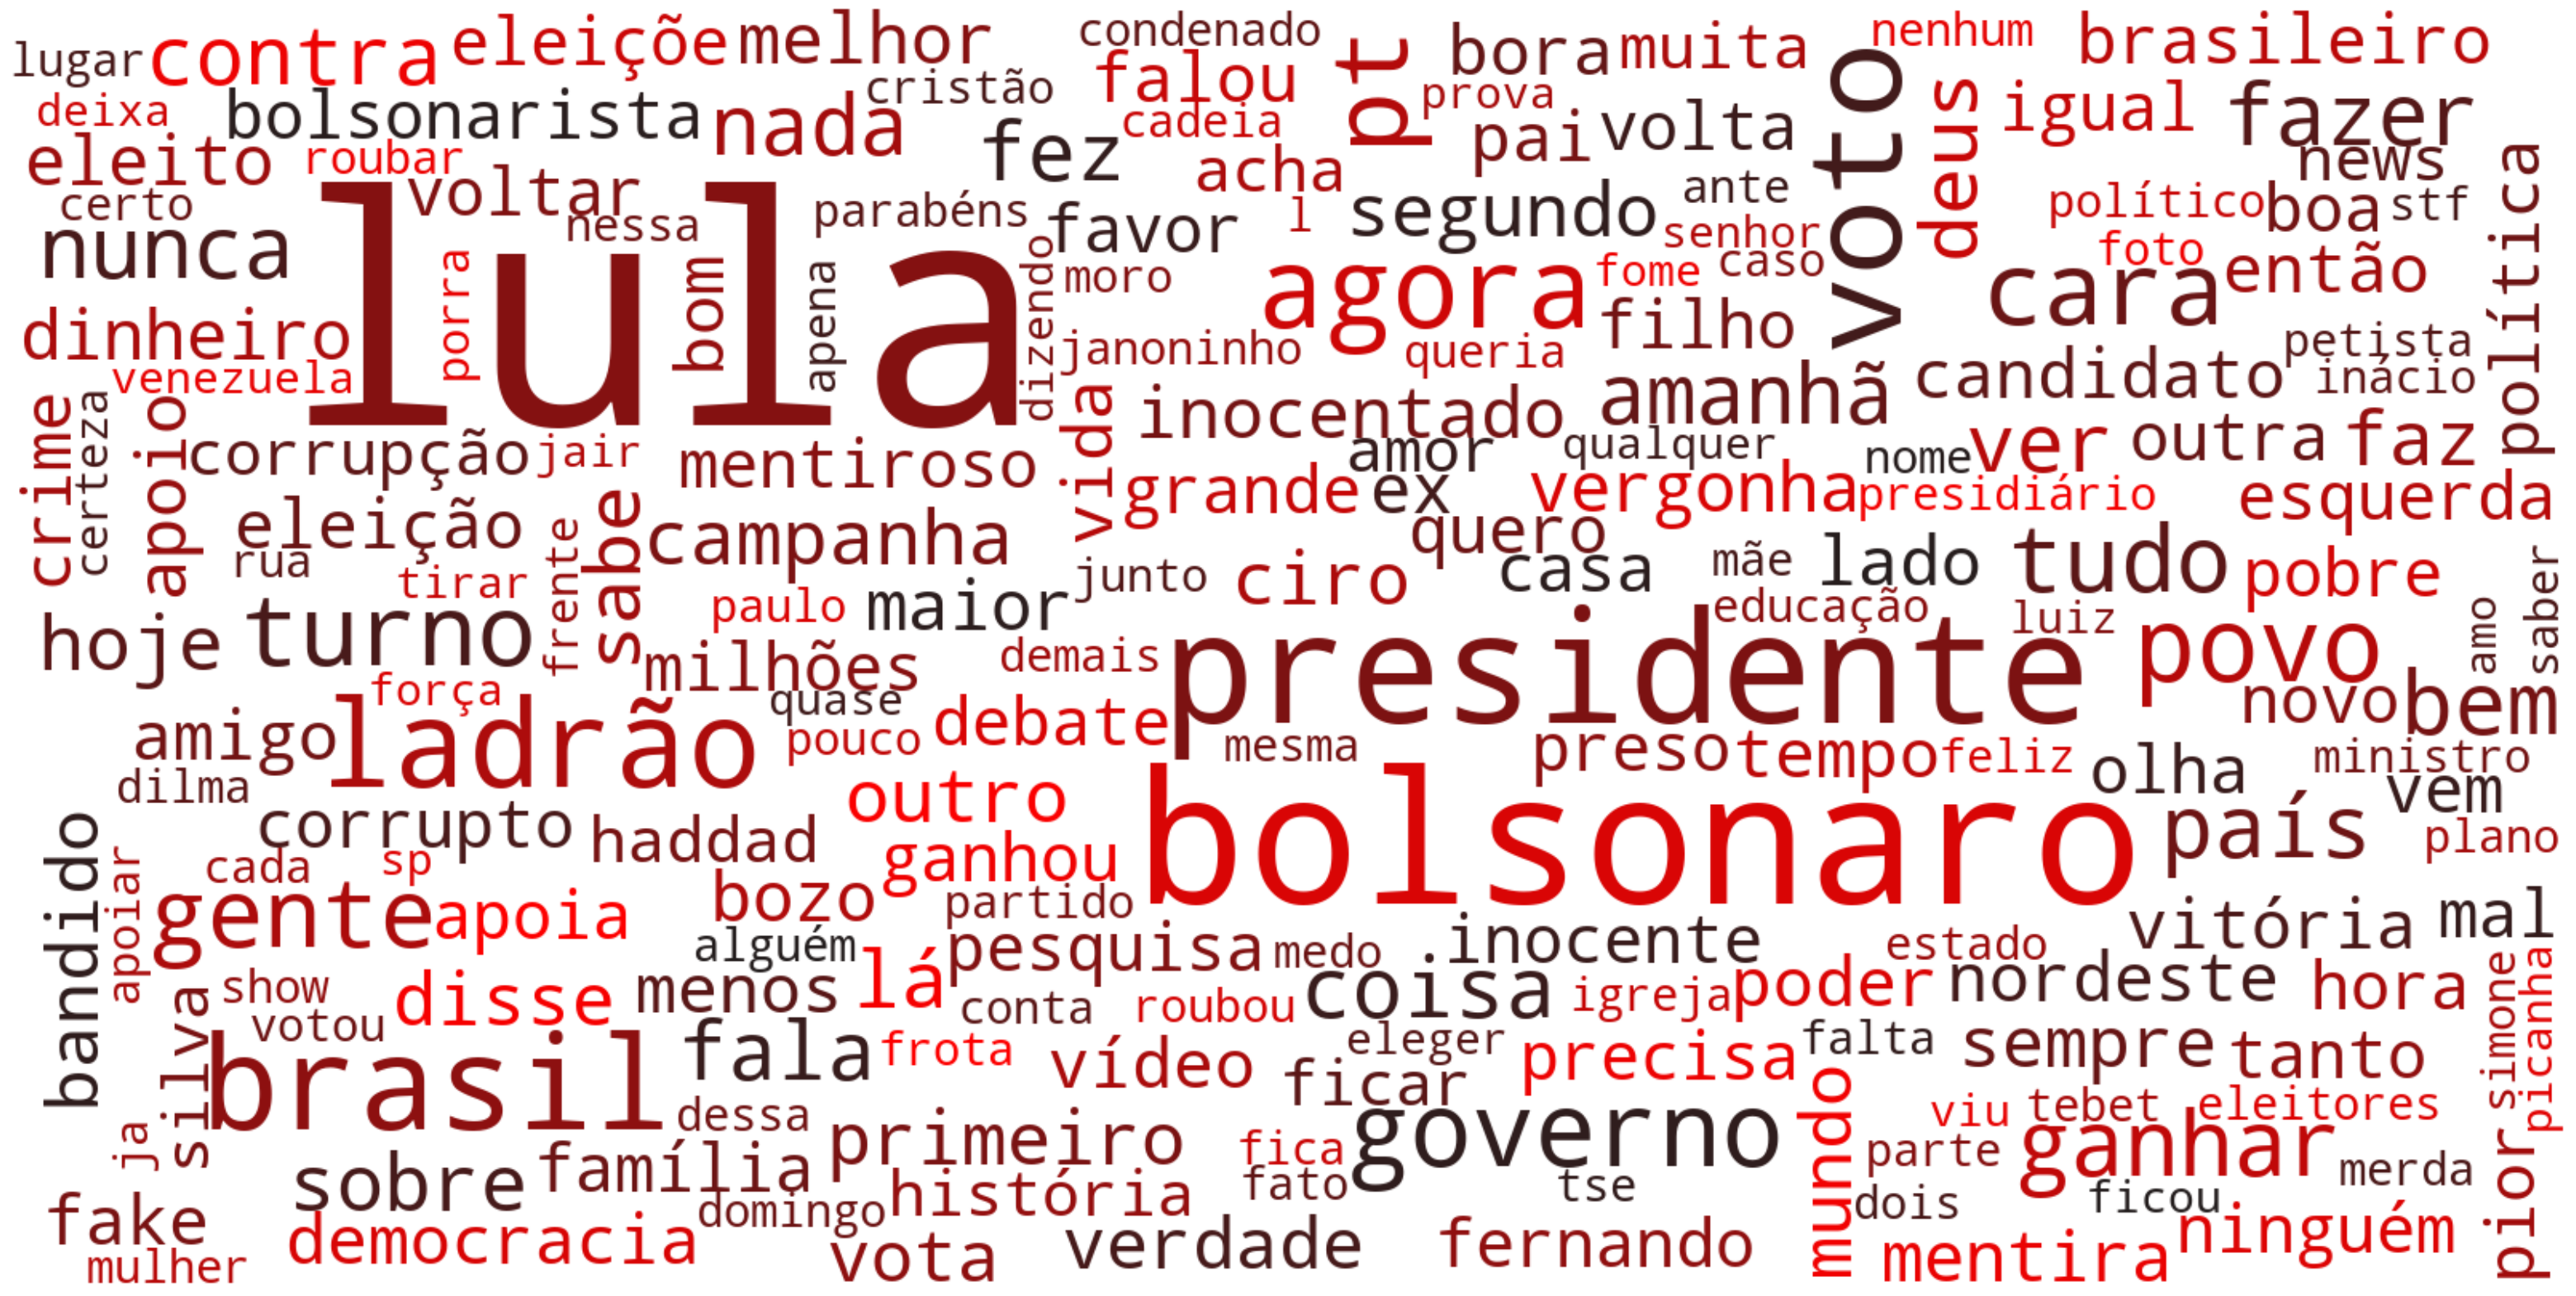

In [6]:
import matplotlib.pyplot as plt

text = str(list(dfLula['pre-processed'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('_', '')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#FF0000'])
wordcloud = WordCloud(width=1600, colormap=cmap, stopwords=stopwords, height=800, max_font_size=200, collocations=False, background_color='white').generate(text)
# Chama a função `figure()` para criar uma nova figura
fig, ax = plt.subplots(figsize=(40, 30))
# Exibe a nuvem de palavras
ax.imshow(wordcloud, interpolation="bilinear")
# Desativa os eixos da figura
ax.set_axis_off()
# Exibe a figura
plt.show()

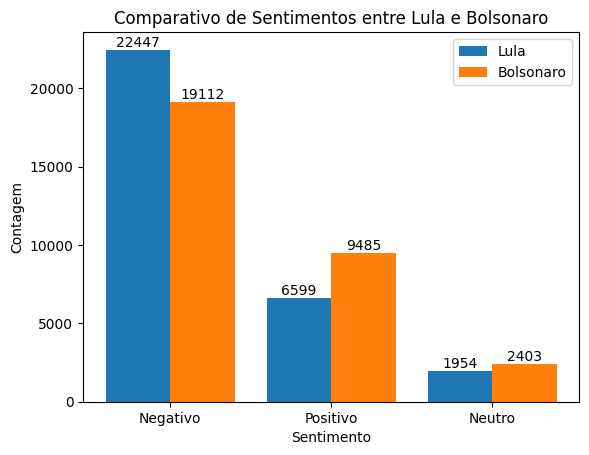

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha os DataFrames dfLula e dfBolsonaro com as colunas 'Sentimento'.

# Calcular a contagem de sentimentos para Lula
contagem_lula = dfLula['Sentimento'].value_counts()

# Calcular a contagem de sentimentos para Bolsonaro
contagem_bolsonaro = dfBolsonaro['Sentimento'].value_counts()

# Criar o histograma com rótulos nas barras
fig, ax = plt.subplots()

bar_width = 0.4
index = range(len(contagem_lula))

plt.bar(index, contagem_lula, bar_width, label='Lula')
plt.bar([i + bar_width for i in index], contagem_bolsonaro, bar_width, label='Bolsonaro')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(contagem_lula.index)

plt.title('Comparativo de Sentimentos entre Lula e Bolsonaro')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.legend()

# Adicionar rótulos às barras
for i, v in enumerate(contagem_lula):
    ax.text(i, v, str(v), ha='center', va='bottom')

for i, v in enumerate(contagem_bolsonaro):
    ax.text(i + bar_width, v, str(v), ha='center', va='bottom')

plt.show()


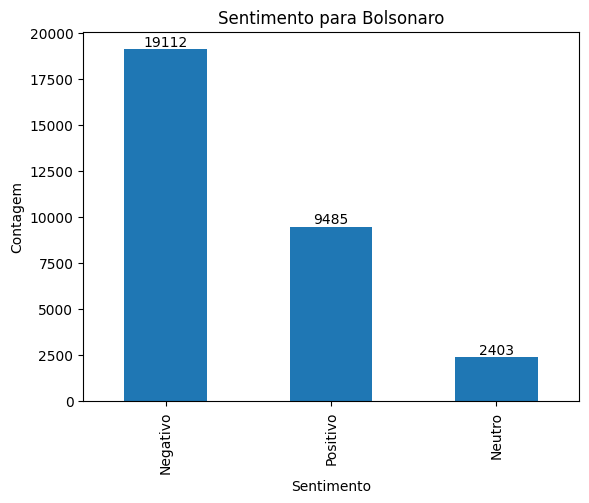

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame df com as colunas 'Candidato' e 'Sentimento'.

# Filtrar o DataFrame para registros com o candidato Bolsonaro
df_bolsonaro = df[df['Candidato'] == 'Bolsonaro']

# Contar o número de registros para cada sentimento
contagem_sentimento = df_bolsonaro['Sentimento'].value_counts()

# Criar o histograma com rótulos nas barras
ax = contagem_sentimento.plot(kind='bar')

plt.title('Sentimento para Bolsonaro')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')

# Adicionar rótulos às barras
for i, v in enumerate(contagem_sentimento):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


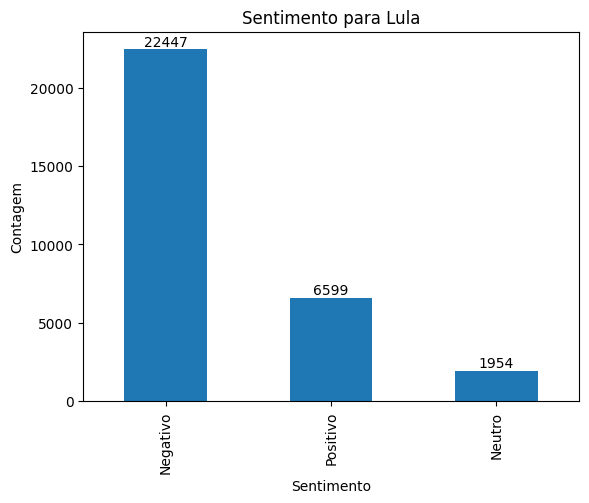

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame df com as colunas 'Candidato' e 'Sentimento'.

# Filtrar o DataFrame para registros com o candidato Bolsonaro
df_bolsonaro = df[df['Candidato'] == 'Lula']

# Contar o número de registros para cada sentimento
contagem_sentimento = df_bolsonaro['Sentimento'].value_counts()

# Criar o histograma com rótulos nas barras
ax = contagem_sentimento.plot(kind='bar')

plt.title('Sentimento para Lula')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')

# Adicionar rótulos às barras
for i, v in enumerate(contagem_sentimento):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()
